<a href="https://colab.research.google.com/github/chacha715/ESAA_OB/blob/main/0317_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **| 모델 훈련 연습 문제**
___
- 출처 : 핸즈온 머신러닝 Ch04 연습문제 1, 5, 9, 10
- 개념 문제의 경우 텍스트 셀을 추가하여 정답을 적어주세요.

### **1. 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?**


#### A) 수백만 개의 특성이 있는 훈련 세트를 가지고 있다면, 확률적 경사 하강법이나 미니배치 경사 하강법을 사용할 수 있다. 훈련 세트가 메모리 크기에 맞으면 배치 경사 하강법도 가능하다. 하지만 정규 방정식이나 SVD 방법은 계산 복잡도가 특성 개수에 따라 매우 빠르게 증가하기 때문에 사용할 수 없다.
___


### **2. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?**


#### A) 에포크마다 검증 에러가 지속적으로 상승한다면 한 가지 가능성은 학습률이 너무 높아 알고리즘이 발산하는 것일 수 있다. 훈련 에러도 올라간다면 이 문제가 확실하므로, 학습률을 낮추어야 한다. 하지만 훈련 에러가 증가하지 않는다면, 모델이 훈련 세트에 과대적합 되어 있는 것이므로 훈련을 멈춰야 한다.
___

### **3. 릿지 회귀를 사용했을 때 훈련 오차가 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요, 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 $\alpha$를 증가시켜야 할까요 아니면 줄여야 할까요?**



#### A) 훈련 에러와 검증 에러가 거의 비슷하고 매우 높다면, 모델이 훈련 세트에 과소적합되었을 가능성이 높다. 즉, 높은 편향을 가진 모델이기 때문에, 규제 하이퍼파라미터  α 를 줄여야 한다.
___

### **4. 다음과 같이 사용해야 하는 이유는?**
___
- 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
- 릿지 회귀 대신 라쏘 회귀
- 라쏘 회귀 대신 엘라스틱넷


#### A) 
- 규제가 있는 모델이 일반적으로 규제가 없는 모델보다 성능이 좋기 때문이다.
- 라쏘 회귀는 $l_1$ 페널티를 사용하여, 가중치를 완전히 0으로 만드는 경향이 있다. 이는 가장 중요한 가중치를 제외하고는 모두 0이 되는 희소한 모델을 만든다. 또한 자동으로 특성 선택의 효과를 가지므로, 일부 특성만 실제로 유용할 것 같을 때 사용하면 좋다. 확신이 없다면 릿지 회귀를 사용해야 한다. 또한 쓰이는 특성이 적을 때는 라쏘 회귀가 릿지 회귀보다 유용하다.
- 라쏘가 어떤 경우에는 불규칙하게 행동하므로, 엘라스틱넷이 라쏘보다 일반적으로 선호된다. 그러나 추가적인 하이퍼 파라미터가 생긴다. 불규칙한 행동이 없는 라쏘를 원하면 엘라스틱 넷에 `l1_ratio`를 1에 가깝게 설정하면 좋다.

### **5. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀를 구현해보세요(사이킷런은 사용하지 마세요)**


---



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris['target']

In [3]:
# Add Bias
X_with_bias = np.c_[np.ones([len(X),1]),X]   
# len(X) 개수 만큼 1로 채워진 [ ], [ ]......[ ] array
# 2열 -> 3열로 늘어남

In [4]:
# 결과를 일정하게 하기 위해, random seed 배정
np.random.seed(1234)

In [5]:
# 원래면 sklearn의 train_test_split을 사용하지만, 직접 만들면서 원리 이해하기
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)    # 150을 무작위로 섞음 

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]  # test_size 만큼 남겨둠
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]   
y_test = y[rnd_indices[-test_size:]]

In [6]:
# 클래스를 OneHot Vector로 바꾸기 
def to_one_hot(y):
    n_classes = y.max()+1    # 0,1,2 라 max=2 / +1 하면 classes 개수
    m = len(y)                     # 총 150개의 라벨들
    y_one_hot = np.zeros((m,n_classes))
    y_one_hot[np.arange(m),y] = 1   # index의 행중에 y값을 1로 치환
    return y_one_hot

In [7]:
y_train[:10]

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2])

In [8]:
to_one_hot(y_train[:10])   # one hot encoding이 된 것을 확인할 수 있다. 

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
# 라벨 전부를 onehot encoding하기
y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)

In [10]:
# Softmax 함수 만들기

def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps,axis=1,keepdims=True)   # axis=1   ->  가장 안쪽의 [ ] 안의 성분의 합 / 각 exps들의 합
    return exps/exp_sums

In [11]:
# 입력과 출력의 갯수 정하기
n_inputs = X_train.shape[1]   # (90,3) 인데 1로 인덱싱 ==3
n_outputs = len(np.unique(y_train))  # y_train값을 중복되지 않는 값들을 출력  3

In [12]:
# 훈련 파트

eta = 0.01
n_iteration = 5001
m = len(X_train)
epsilon = 1e-7 # ε : 입실론     nan값을 피하기 위해 logPi에 추가.

Theta = np.random.randn(n_inputs,n_outputs)

for i in range(n_iteration):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - y_train_one_hot
    if i % 500 == 0:
        print(i,loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients 

0 3.1114915802681646
500 0.8785451855619314
1000 0.7103533106437264
1500 0.6136193727911318
2000 0.5518526140625929
2500 0.5086585463656746
3000 0.4762907516068719
3500 0.45076167129780975
4000 0.42984346695974646
4500 0.41220116725499784
5000 0.39698683289431363


In [13]:
# 모델 파라미터 확인
Theta

array([[ 2.68979228, -0.7826269 , -2.70314023],
       [-0.39955204,  0.45023269,  0.05089443],
       [-2.42533074, -0.66589863,  1.80156464]])

In [14]:
# 검증 세트에 대한 정확도 확인 
logits = X_valid.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy = np.mean(y_predict == y_valid)
accuracy
# 모델이 매우 잘 작동하는 것으로 확인됨
# L2규제를 추가해보자

0.9

In [15]:
eta = 0.1
n_iteration = 5001
m = len(X_train)
epilson = 1e-7
alpha = 0.1  # 규제 파라미터 

Theta = np.random.randn(n_inputs,n_outputs)

for i in range(n_iteration):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    entropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = entropy_loss + alpha * l2_loss
    error = Y_proba - y_train_one_hot
    if i % 500 == 0:
        print(i,loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1,n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.135593777893689
500 0.538428329796786
1000 0.5093655628163154
1500 0.5009568607421143
2000 0.4978808079290177
2500 0.4966559287329126
3000 0.49614679586131877
3500 0.4959299026541329
4000 0.4958361134372299
4500 0.495795173863377
5000 0.4957771952771175


In [16]:
# l2 패널티 때문에 손실이 더 커보인다. 모델이 더 잘 작동하는지 확인해보자
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba,axis=1)

acc = np.mean(y_predict == y_valid)
acc
# 더 성능이 좋은 모델이 되었다. 

0.9333333333333333

In [17]:
# 조기 종료 추가
eta = 0.1
m = len(X_train)
iteration= 5001
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty

Theta = np.random.randn(n_inputs,n_outputs)

for i in range(iteration):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    entropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = entropy_loss + alpha * l2_loss
    error = Y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[(np.zeros([1,n_outputs]),alpha * Theta[1:])]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(i,loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(i-1, best_loss)
        print(i,loss,"Early Stopping!")
        break

3057 0.5616512161922435
3058 0.5616512162651615 Early Stopping!


In [18]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

# 학습이 더 빠르게 종료되었다. 

0.9333333333333333

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


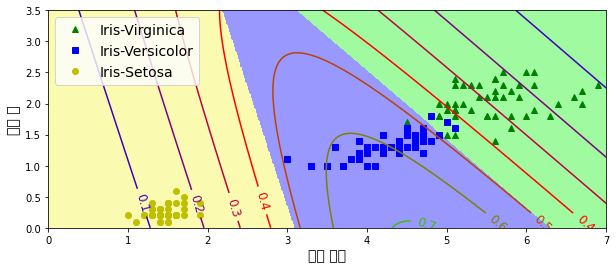

In [19]:
# 한글출력
import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 폭", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [20]:
# 최종 테스트 데이터 예측 
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

# 매우 정확한 예측도를 보였다. 

1.0